# Photonic Quantum Fourier Transform Local Simulation

### Prerequisites
- Install Perceval using ```pip install perceval-quandela```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import perceval as pcvl
import perceval.components as comp
from perceval import Processor, BasicState
from perceval.algorithm import Sampler

In [3]:
def bitstring_to_fock(bitstring):
    # if the parameter is a string, make it a list of ints
    if isinstance(bitstring, str):
        bits = [int(b) for b in bitstring]
    else:
        bits = list(bitstring)

    n = len(bits)
    N = 2 ** n
    index = int("".join(str(b) for b in bits), 2)

    occ = [0] * N
    occ[index] = 1

    # basic state is fock state w/ perceval
    return BasicState(occ)


In [4]:
# qft matrix
def qft_matrix(num_qubits):
    N = 2 ** num_qubits
    omega = np.exp(2j * np.pi / N)
    matrix = np.array([[omega ** (k * l) for l in range(N)] for k in range (N)], dtype = complex) / np.sqrt(N)

    return pcvl.Matrix(matrix)

In [5]:
# unitary of the qft
def qft_unitary_component(num_qubits):
    U = qft_matrix(num_qubits)
    qft_unit = comp.Unitary(U = U)
    return qft_unit

In [6]:
def photonic_qft(num_qubits, bitstring, shots = 1024):
    N = 2 ** num_qubits

    qft_unitary = qft_unitary_component(num_qubits)

    processor = Processor("SLOS", qft_unitary)

    input_state = bitstring_to_fock(bitstring)
    processor.with_input(input_state)
    processor.min_detected_photons_filter(1)

    sampler = Sampler(processor)
    results = sampler.sample_count(shots)["results"]

    print("QFT unitary on", N, "modes:")
    pcvl.pdisplay(qft_unitary.U)

    return results


In [7]:
def normalize_counts(counts):
    total = sum(counts.values())
    return {k: v / total for k, v in counts.items()}

In [8]:
def plot_results(counts, title = "QFT output"):
    probabilities = normalize_counts(counts)
    states = list(probabilities.keys())
    prob_values = [float(v) for v in probabilities.values()]

    labels = [str(s) for s in states]

    plt.figure()
    plt.bar(range(len(states)), prob_values)
    plt.xticks(range(len(states)), labels, rotation = 45)
    plt.ylabel("Probability")
    plt.title(title)
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_bitstring_probabilities(counts, num_qubits, title = "QFT Output"):
    total = sum(counts.values())
    data = []

    # bs = basis state = fock state
    for bs, c in counts.items():
        occ = list(bs)
        i = occ.index(1)
        bitstr = format(i, f"0{num_qubits}b")
        prob = c / total
        data.append((i, bitstr, prob))

    data.sort(key = lambda t: t[0])

    x = [t[1] for t in data]
    y = [t[2] for t in data]

    plt.figure(figsize = (12, 5))
    plt.bar(x, y)
    plt.xticks(rotation = 60)
    plt.ylabel("Probability")
    plt.title(title)
    plt.ylim(0, 1.0)
    plt.tight_layout()

In [10]:
def fock_to_index(bs):
    occ = list(bs)
    return occ.index(1)

def plot_counts(counts, num_qubits, title = "Photnic QFT Result Count Distribution"):
    data = []
    for bs, c in counts.items():
        i = fock_to_index(bs)
        bitstr = format(i, f"0{num_qubits}b")
        data.append((i, bitstr, c))

    data.sort(key = lambda t: t[0])

    indices = [t[0] for t in data]
    bitlabels = [t[1] for t in data]
    counts = [t[2] for t in data]

    plt.figure(figsize = (10, 5))
    plt.bar(indices, counts)
    plt.xticks(indices, bitlabels, rotation = 60, ha = "right")
    plt.xlabel("Bitstring |x⟩")
    plt.ylabel("Counts")
    plt.title(title)
    plt.tight_layout()
    plt.show()

### Sample Output with 2 Qubits

QFT unitary on 4 modes:


<IPython.core.display.Math object>

{
  |1,0,0,0>: 267
  |0,1,0,0>: 262
  |0,0,1,0>: 248
  |0,0,0,1>: 247
}


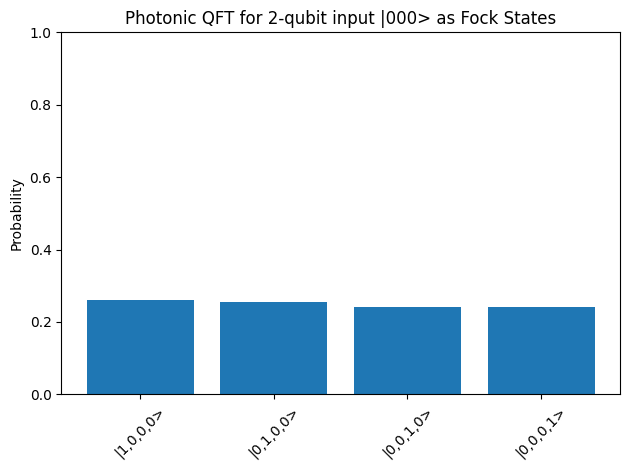

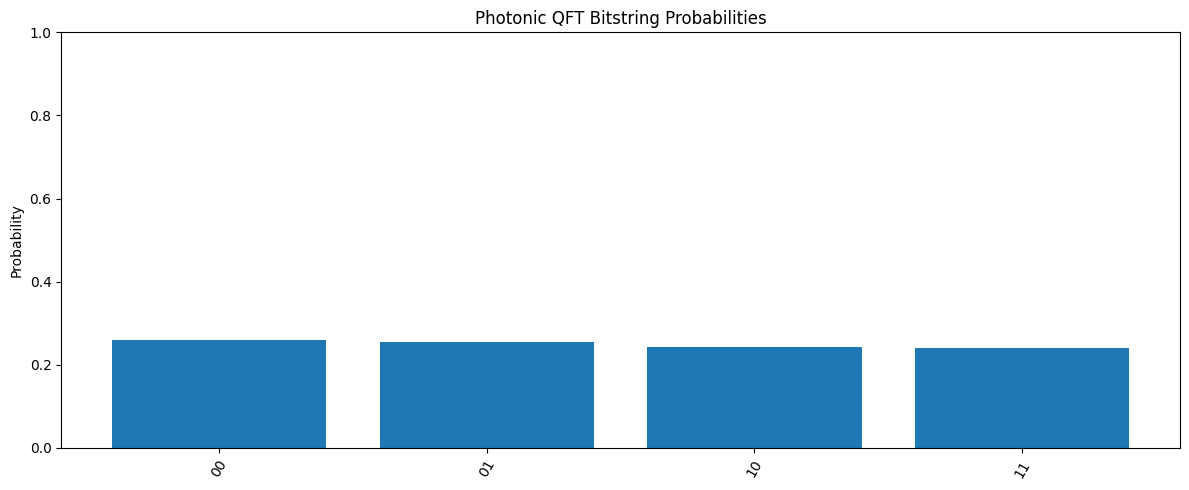

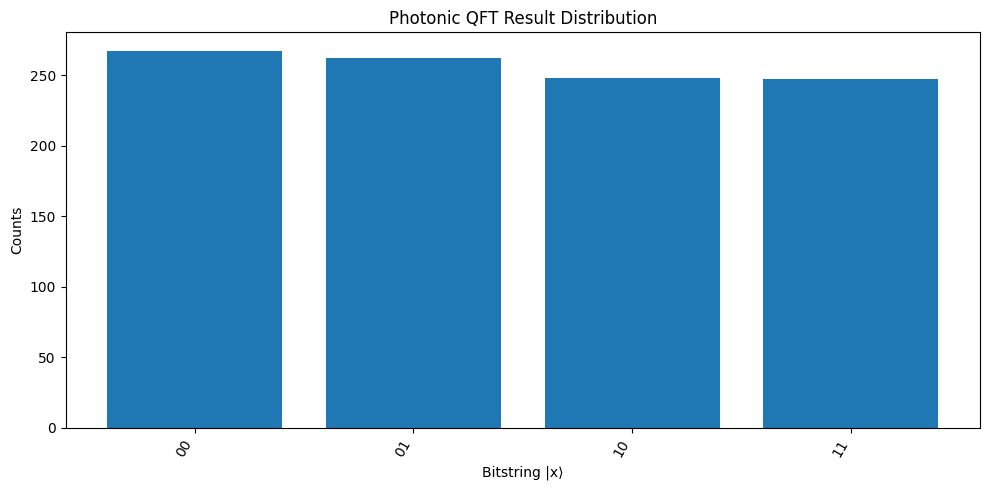

In [11]:
res_2 = photonic_qft(2, "00", shots = 1024)
print(res_2)
# plot
plot_results(res_2, "Photonic QFT for 2-qubit input |000> as Fock States")
plot_bitstring_probabilities(res_2, 2, "Photonic QFT Bitstring Probabilities")
plot_counts(res_2, num_qubits = 2, title = "Photonic QFT Result Distribution")

### Sample Output with 3 Qubits

QFT unitary on 8 modes:


<IPython.core.display.Math object>

{
  |1,0,0,0,0,0,0,0>: 144
  |0,1,0,0,0,0,0,0>: 134
  |0,0,1,0,0,0,0,0>: 121
  |0,0,0,0,0,0,1,0>: 131
  |0,0,0,1,0,0,0,0>: 139
  |0,0,0,0,1,0,0,0>: 119
  |0,0,0,0,0,1,0,0>: 116
  |0,0,0,0,0,0,0,1>: 120
}


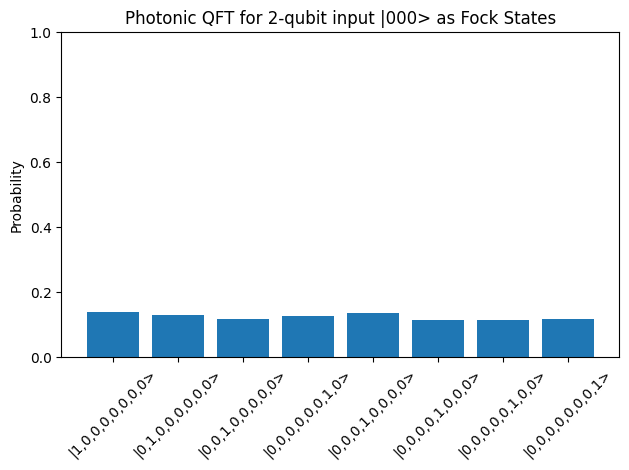

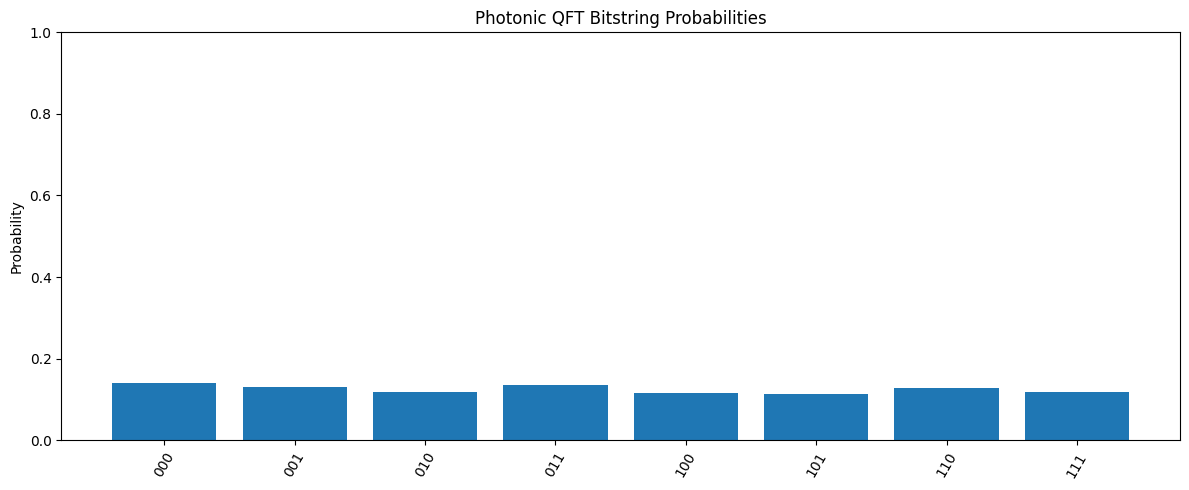

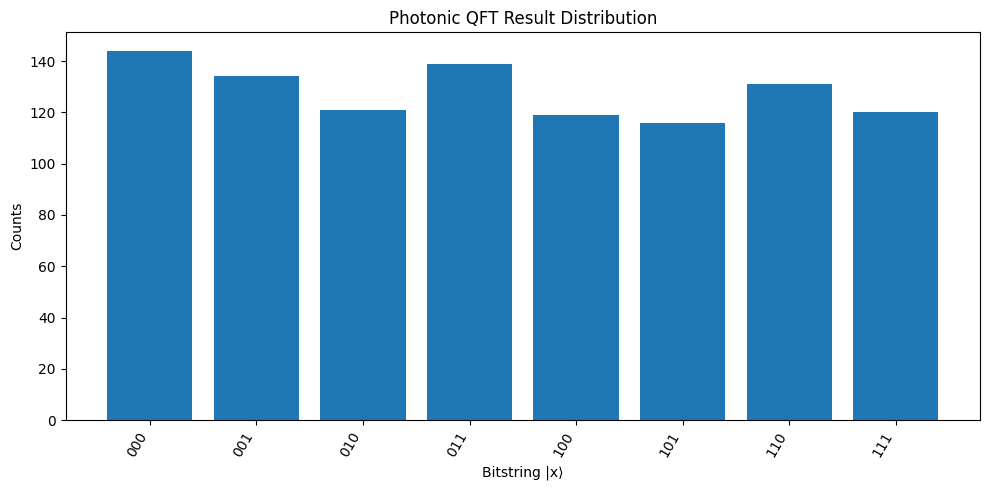

In [12]:
res_3 = photonic_qft(3, "000", shots = 1024)
print(res_3)
# plot
plot_results(res_3, "Photonic QFT for 2-qubit input |000> as Fock States")
plot_bitstring_probabilities(res_3, 3, "Photonic QFT Bitstring Probabilities")
plot_counts(res_3, num_qubits = 3, title = "Photonic QFT Result Distribution")

### Sample Output With 4 Qubits

QFT unitary on 16 modes:


<IPython.core.display.Math object>

{
  |0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0>: 66
  |0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0>: 65
  |0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0>: 70
  |0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1>: 72
  |0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0>: 74
  |1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0>: 62
  |0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0>: 63
  |0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0>: 69
  |0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0>: 51
  |0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0>: 62
  |0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0>: 65
  |0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0>: 65
  |0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0>: 57
  |0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0>: 67
  |0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0>: 44
  |0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0>: 72
}


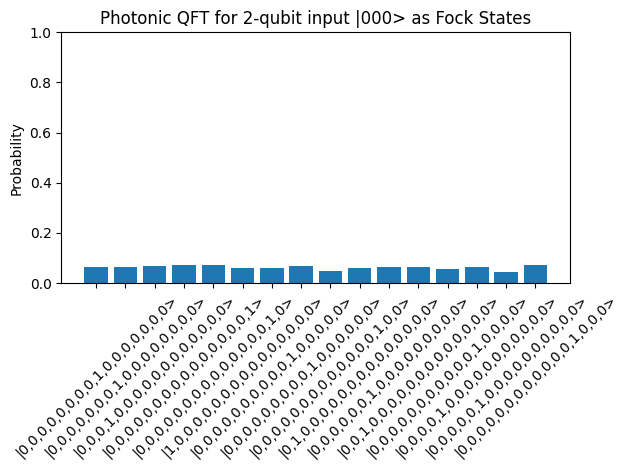

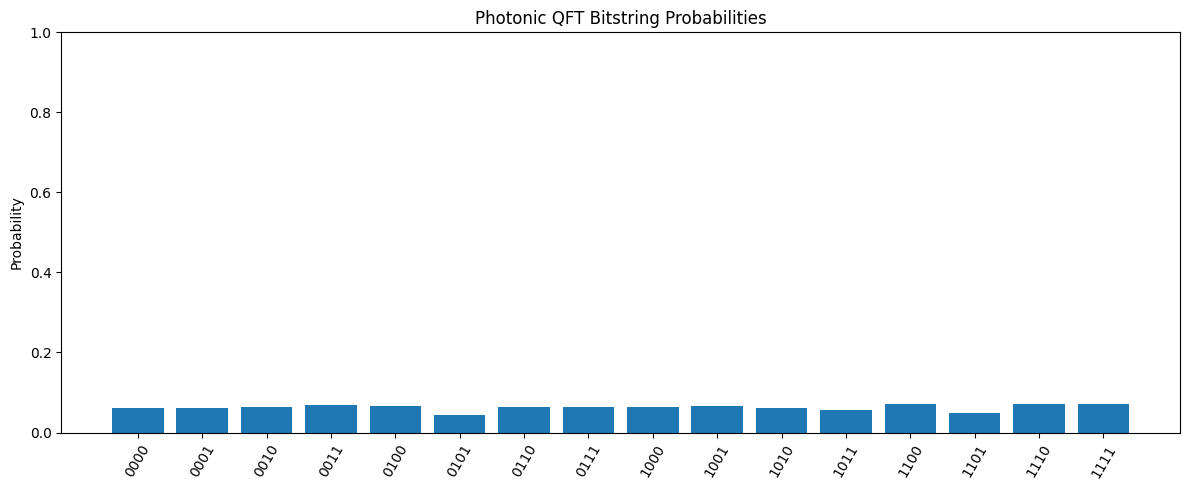

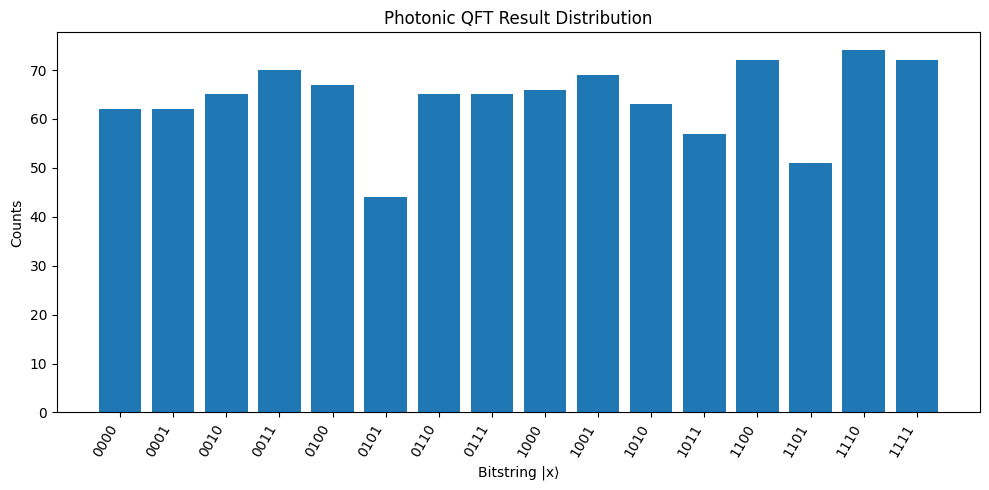

In [13]:
res_4 = photonic_qft(4, "0000", shots = 1024)
print(res_4)
# plot
plot_results(res_4, "Photonic QFT for 2-qubit input |000> as Fock States")
plot_bitstring_probabilities(res_4, 4, "Photonic QFT Bitstring Probabilities")
plot_counts(res_4, num_qubits = 4, title = "Photonic QFT Result Distribution")